In [51]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>Data Cleaning</h1>

In [52]:
df = pd.read_csv('/content/drive/MyDrive/maternal+health+risk/Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Check fo null values

In [53]:
df.info()
df.isnull().sum()

# Count of NaN values in each column
nan_counts = df.isnull().sum()

# Filter columns with at least one NaN value
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

if len(columns_with_nan) == 0:
  print("no column with NAN values")
else:
  print(columns_with_nan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
no column with NAN values


Remove duplicates

In [54]:
df = df.drop_duplicates(ignore_index=True)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70,mid risk
448,15,100,60,6.0,98.0,80,low risk
449,15,100,49,7.6,98.0,77,low risk
450,12,100,50,6.0,98.0,70,mid risk


Outlier detection


In [55]:
df_numerical = df.drop(columns=['RiskLevel'])
data_types = df_numerical.dtypes
print(data_types)
df_numerical = df_numerical[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]
df_numerical

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
dtype: object


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
447,12,100,50,6.4,98.0,70
448,15,100,60,6.0,98.0,80
449,15,100,49,7.6,98.0,77
450,12,100,50,6.0,98.0,70


Standardize the data

In [56]:
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_numerical)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_numerical.columns)
df_scaled

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.277878,1.149703,0.368914,3.135495,-0.479245,1.602005
1,0.458188,1.723546,1.104674,2.235886,-0.479245,-0.549961
2,0.016549,-1.145671,-0.366846,-0.013136,1.065190,0.795018
3,0.090155,1.723546,0.736794,-0.462940,-0.479245,-0.549961
4,0.458188,0.575859,-1.102606,-0.867764,-0.479245,0.257026
...,...,...,...,...,...,...
422,-1.234763,-0.571828,-1.838366,-0.732823,-0.479245,-0.549961
423,-1.013944,-0.571828,-1.102606,-0.912745,-0.479245,0.795018
424,-1.013944,-0.571828,-1.911942,-0.193058,-0.479245,0.391524
425,-1.234763,-0.571828,-1.838366,-0.912745,-0.479245,-0.549961



<h1>Feature Removing</h1>

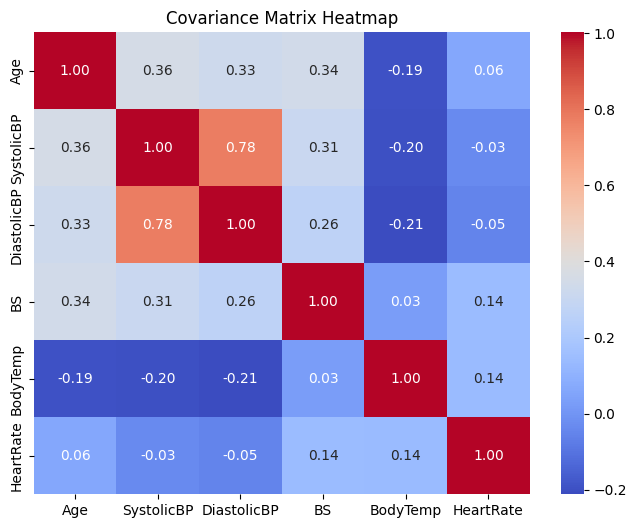

In [57]:
cov_matrix = df_scaled.cov()
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Covariance Matrix Heatmap')
plt.show()

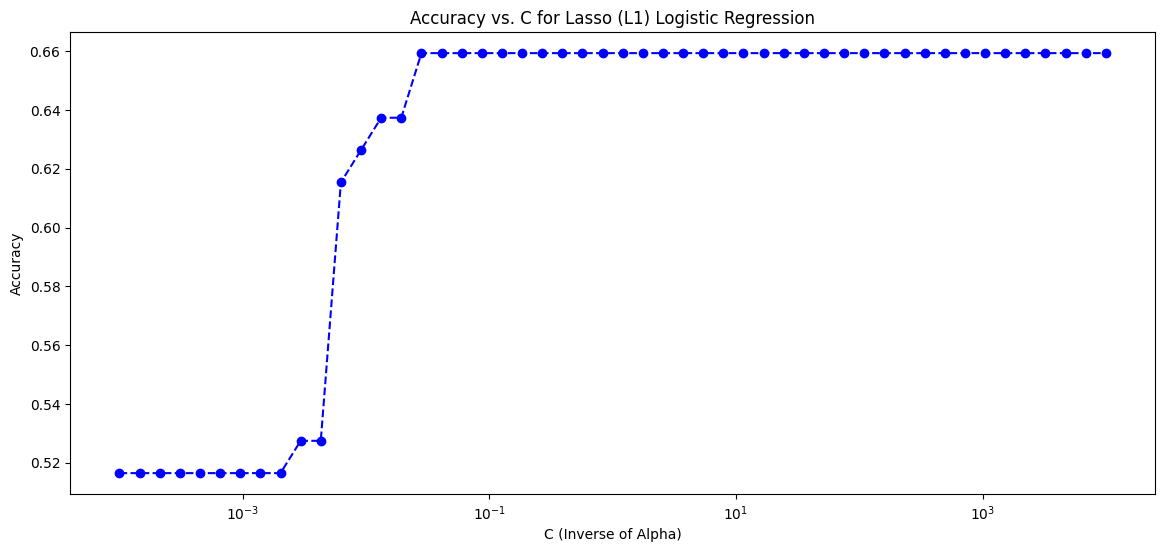

Best C: 0.02811768697974228


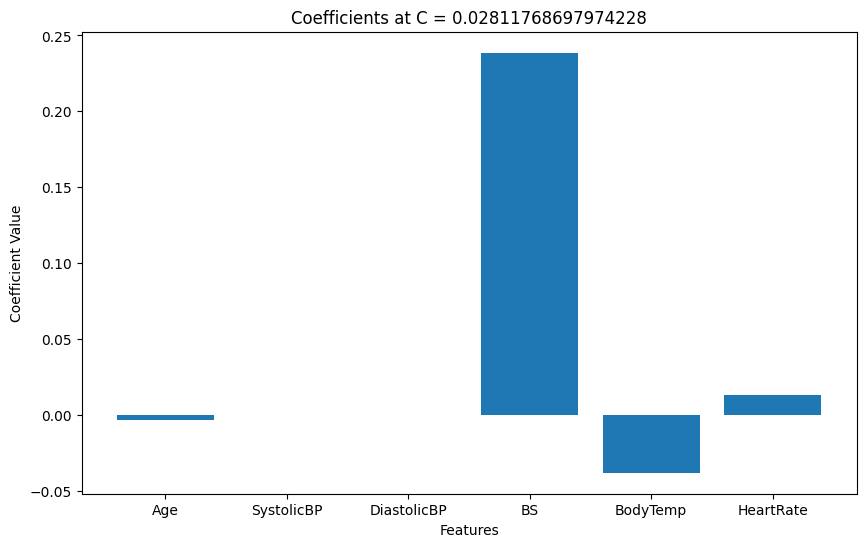

Accuracy at best C (0.02811768697974228): 0.6593406593406593


In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of C values to test (C is the inverse of alpha)
Cs = np.logspace(-4, 4, 50)
accuracy_values = []

# Train Logistic Regression models for different C values and calculate accuracy and log loss
for C in Cs:
    log_reg = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=10000)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    y_pred_prob = log_reg.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot accuracy and log loss against C values
plt.figure(figsize=(14, 6))
plt.plot(Cs, accuracy_values, marker='o', linestyle='--', color='b')
plt.xscale('log')
plt.xlabel('C (Inverse of Alpha)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C for Lasso (L1) Logistic Regression')

plt.show()

# Determine the best C value
best_C_index = np.argmax(accuracy_values)
best_C = Cs[best_C_index]
print(f"Best C: {best_C}")

# Train the Logistic Regression model with the best C value
log_reg_best = LogisticRegression(penalty='l1', solver='saga', C=best_C, max_iter=10000)
log_reg_best.fit(X_train, y_train)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(X.columns, log_reg_best.coef_[0])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title(f'Coefficients at C = {best_C}')
plt.show()

# Print accuracy and log loss for the best C value
best_accuracy = accuracy_values[best_C_index]
print(f"Accuracy at best C ({best_C}): {best_accuracy}")